# Dataset:

Telecom Churn Prediction Dataset

 * Description: Contains customer information for a subscription-based service provider to predict customer churn (leaving the service).
 * Columns: Includes customer details, Service used, contract terms, and churn status.
 * Purpose: Used for customer churn analysis, segmentation and retention strategies.
 * Applications: Churn prediction, customer satisfaction analysis and targeted marketing.
 * Analysis Tasks: EDA, data preprocessing, ML model building, evaluation, and model deployment.
 * Relevance: A practical dataset for real-world data science and customer relationship management scenarios.

# Step 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Step 2 : Loading the dataset

In [2]:
tele_cust = pd.read_csv("Telco_Customer_Churn.csv")

# Step 3: Data Preprocessing & EDA

In [3]:
tele_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
tele_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
tele_cust.shape

(7043, 21)

In [6]:
tele_cust.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
tele_cust.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
tele_cust.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# while converting dtype of "TotalCharges" i got an error
# ERROR: Unable to parse string " " at position 488

In [10]:
tele_cust[tele_cust['TotalCharges'] == ' '].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [11]:
'''
dropping rows with NaN values in the "TotalCharges" column because these values can vary for each customer based on the 
services they have opted for. Therefore, it is better to drop these 11 rows.
'''

tele_cust.drop([488,753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], axis =0 , inplace = True)

In [12]:
tele_cust['TotalCharges'] = pd.to_numeric(tele_cust['TotalCharges'])

In [13]:
# Removing customer Ids from the data

df = tele_cust.iloc[:,1:]

In [14]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
# Converting the predictor variable in a binary numeric variable

df['Churn'] = df['Churn'].map({'No': 0,'Yes': 1})

In [16]:
# converting all the categorical variables into dummy variables

df_dummies = pd.get_dummies(df, drop_first= True)

In [17]:
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


<Axes: >

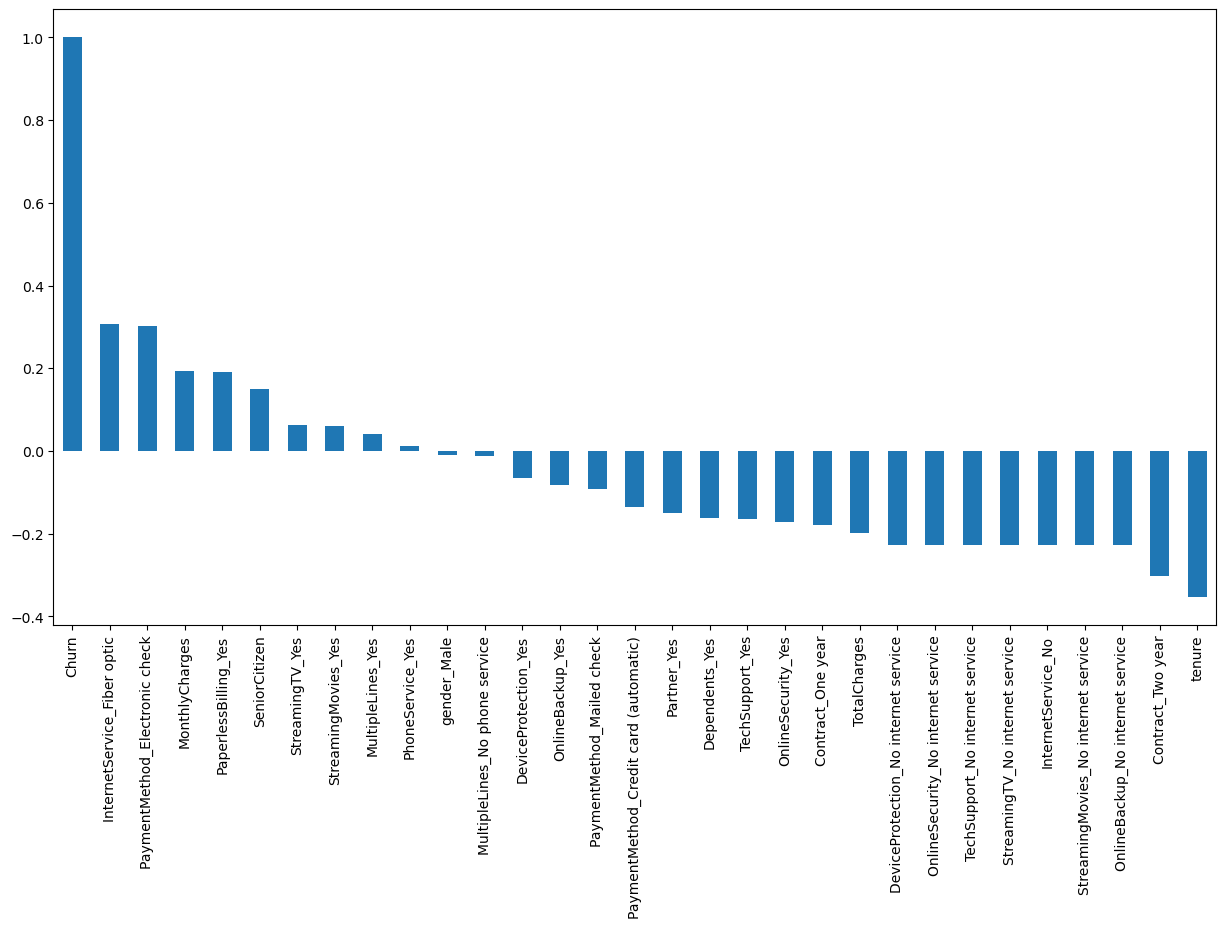

In [18]:
# Get Correlation pf "Churn" with other variables

plt.figure(figsize = (15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

## Interpretation

"Month-to-month contracts and Senior Citizens are positively correlated with churn that means they are most likely to churn. While, tenure and two-year contracts are negatively correlated with churn.

Interestingly, services like online security, streaming TV, online backup, and tech support without an internet connection are also negatively related to churn.

We will explore these correlation patterns further before modeling and identifying the key variables."


# Step 4: Data Exploration


## A) Demographic
 
 * Gender, Age-Range, Partner and Dependent status

#### 1. Gender Distribution

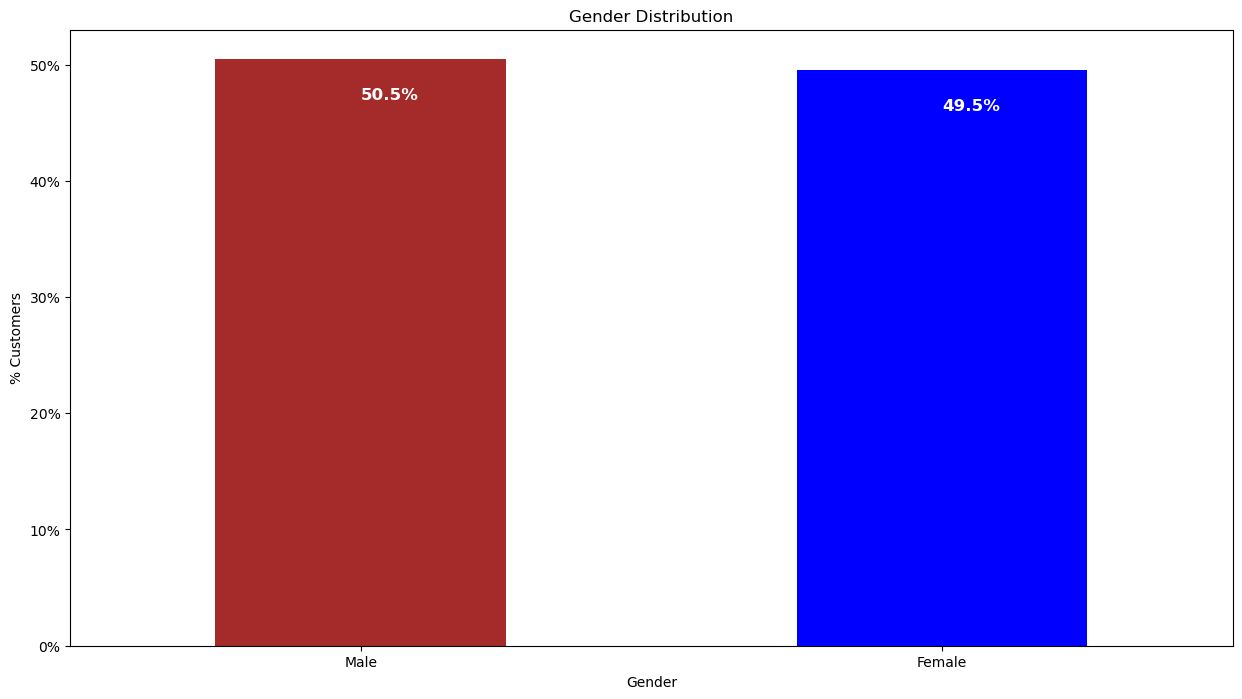

In [19]:
plt.figure(figsize = (15,8))
colors = ['brown', 'blue']
gender_counts = tele_cust['gender'].value_counts()
ax = (gender_counts * 100.0/ len(tele_cust)).plot(
    kind = 'bar', 
    stacked = True, 
    rot = 0, color = colors
)

import matplotlib.ticker as mtick

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution')

total = gender_counts.sum()
for bar, count in zip(ax.patches, gender_counts):
    percentage = count / total * 100
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 3.5,
           f'{percentage:.1f}%', 
            fontsize = 12, 
            color = 'white', 
            weight = 'bold'
           )
plt.show()



* Almost half are male & other half are female

#### 1. Senior Citizen (%)

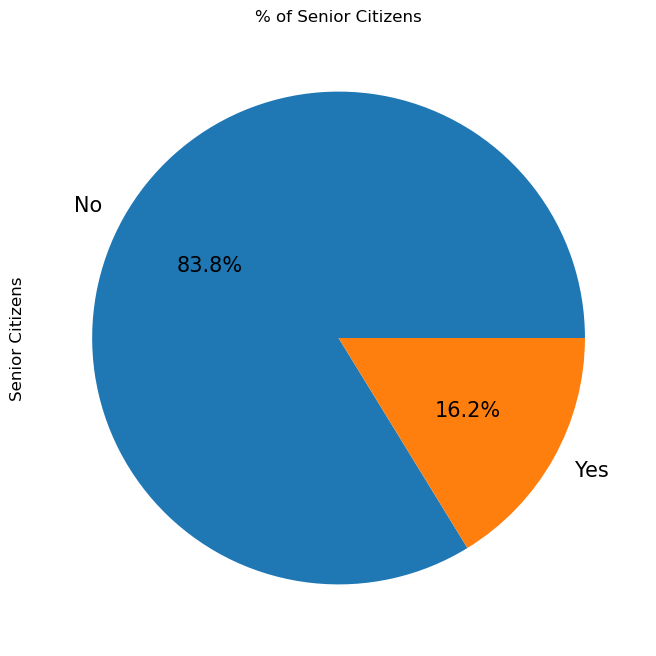

In [20]:
ax = (tele_cust['SeniorCitizen'].value_counts()*100.0 / len(tele_cust))\
.plot.pie(autopct = '%.1f%%',labels = ['No','Yes'], figsize =(15,8),fontsize = 15)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)
plt.show()

 * Only 16% are senior citizen, that means most of the customer are younger people

#### 3. Partner and dependent status

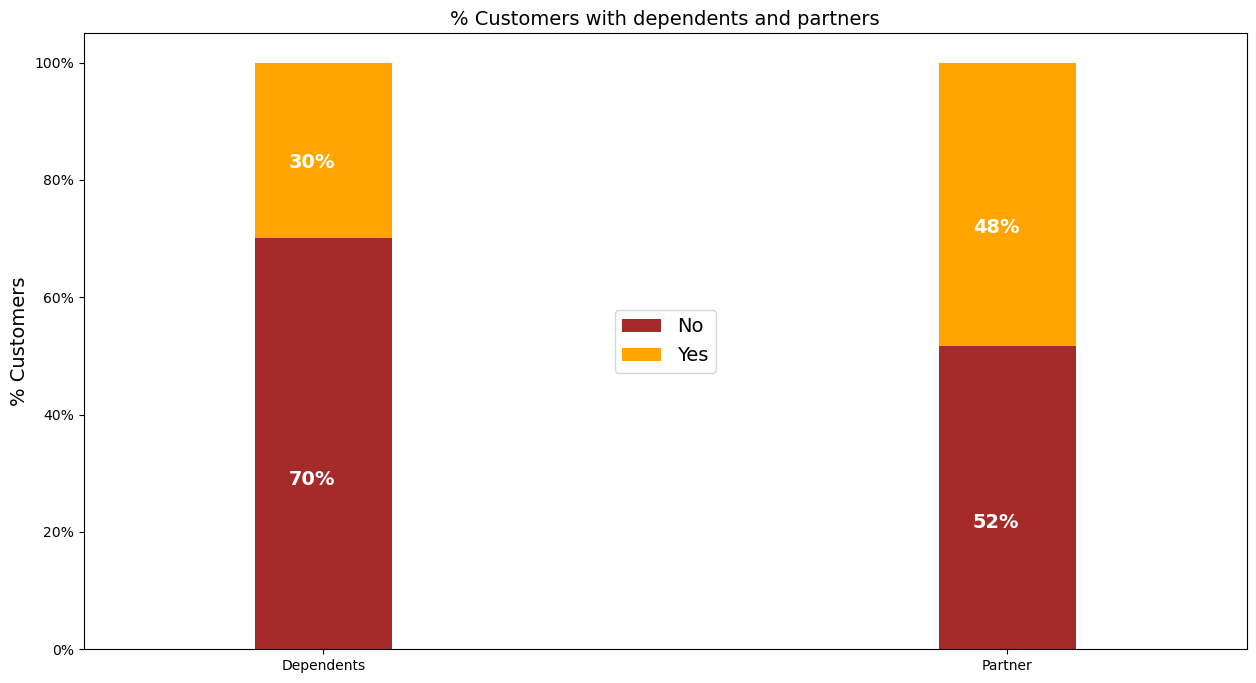

In [21]:
df = pd.melt(tele_cust, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df_grouped = df.groupby(['variable','value']).count().unstack()
df_grouped = df_grouped*100/len(tele_cust)
colors = ['brown','orange']
ax = df_grouped.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(15,8),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

* About 50% of the customers have a partner, while only 30% of the total customers have dependents.

## B) Customer Account Information

* Tenure & contract

#### 1. Tenure

Text(0.5, 1.0, 'No of Customers by their tenure')

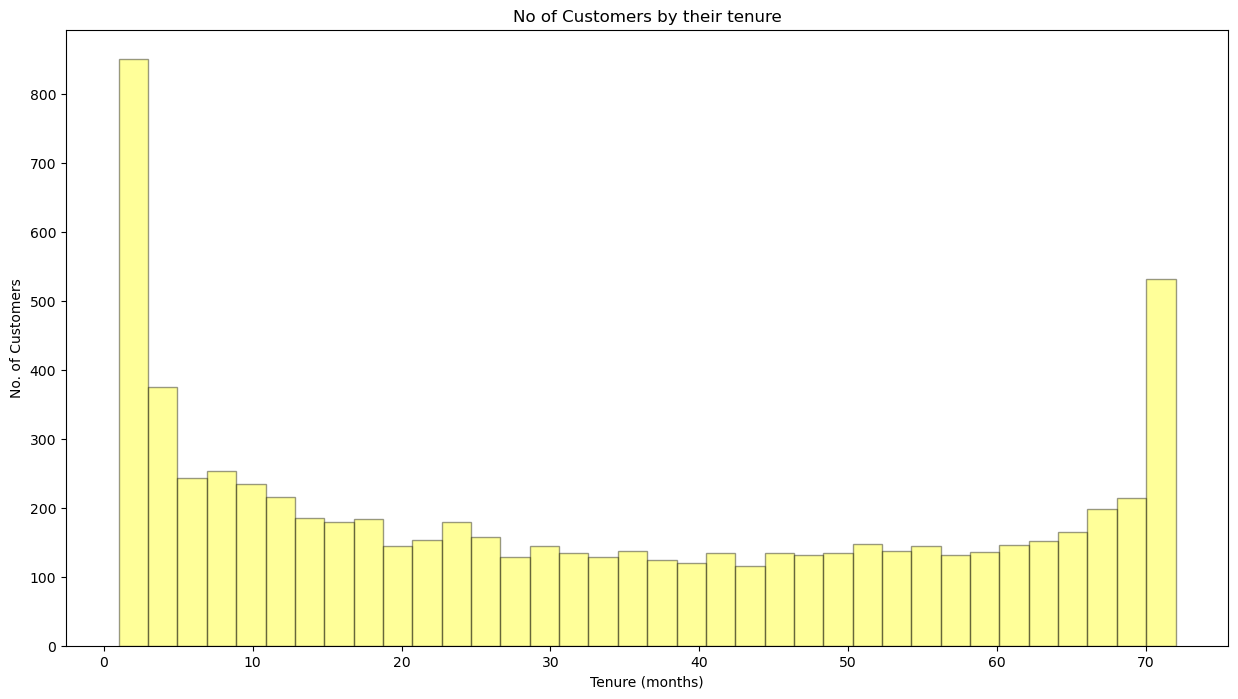

In [22]:
plt.figure(figsize = (15,8))
ax = sns.distplot(tele_cust['tenure'], hist = True, kde = False,
                 bins = int(180/5),
                 color = 'yellow',
                 hist_kws = {'edgecolor' : 'black'},
                 kde_kws = {'linewidth' : 4})
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('No of Customers by their tenure')

#### 2. Contracts

Text(0.5, 1.0, 'No. of Customers by Contract Type')

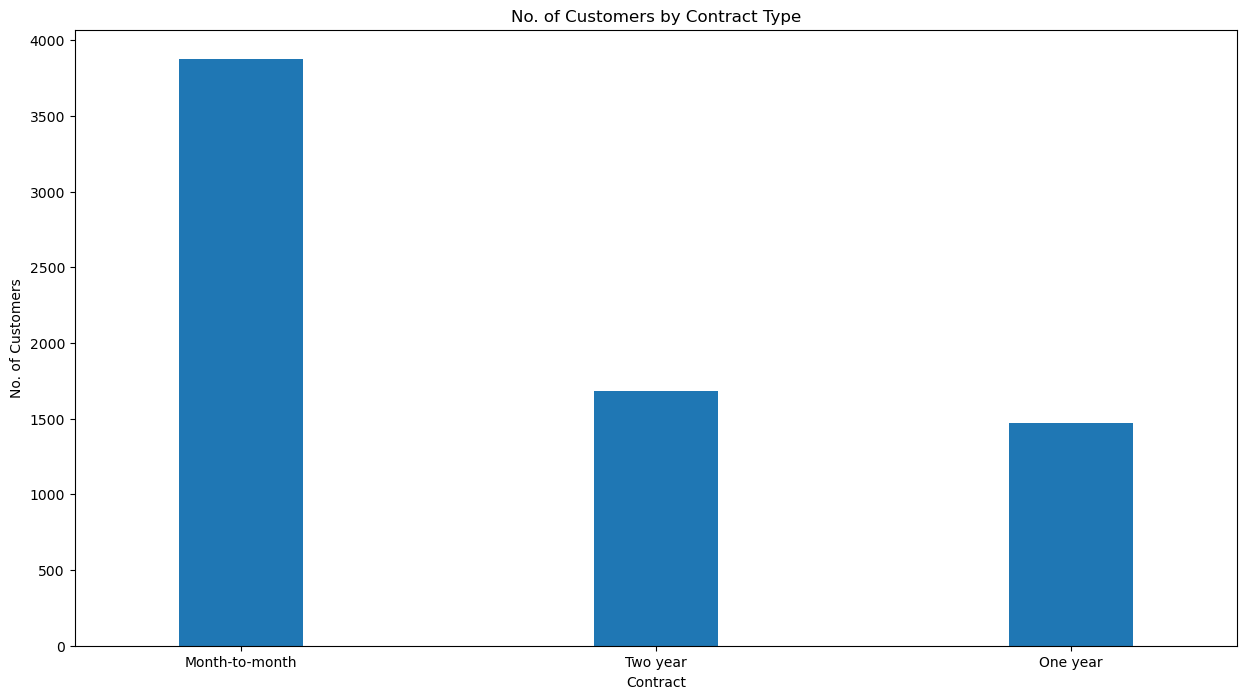

In [23]:
plt.figure(figsize=(15,8))
ax = tele_cust['Contract'].value_counts().plot(kind = 'bar', rot = 0, width = 0.3)
ax.set_ylabel('No. of Customers')
ax.set_title('No. of Customers by Contract Type')

* Most of the customers are in the month to month contract while there are equal number of customers in the 1 year and 2 year contracts

Text(0.5, 1.0, 'Two Year Contract')

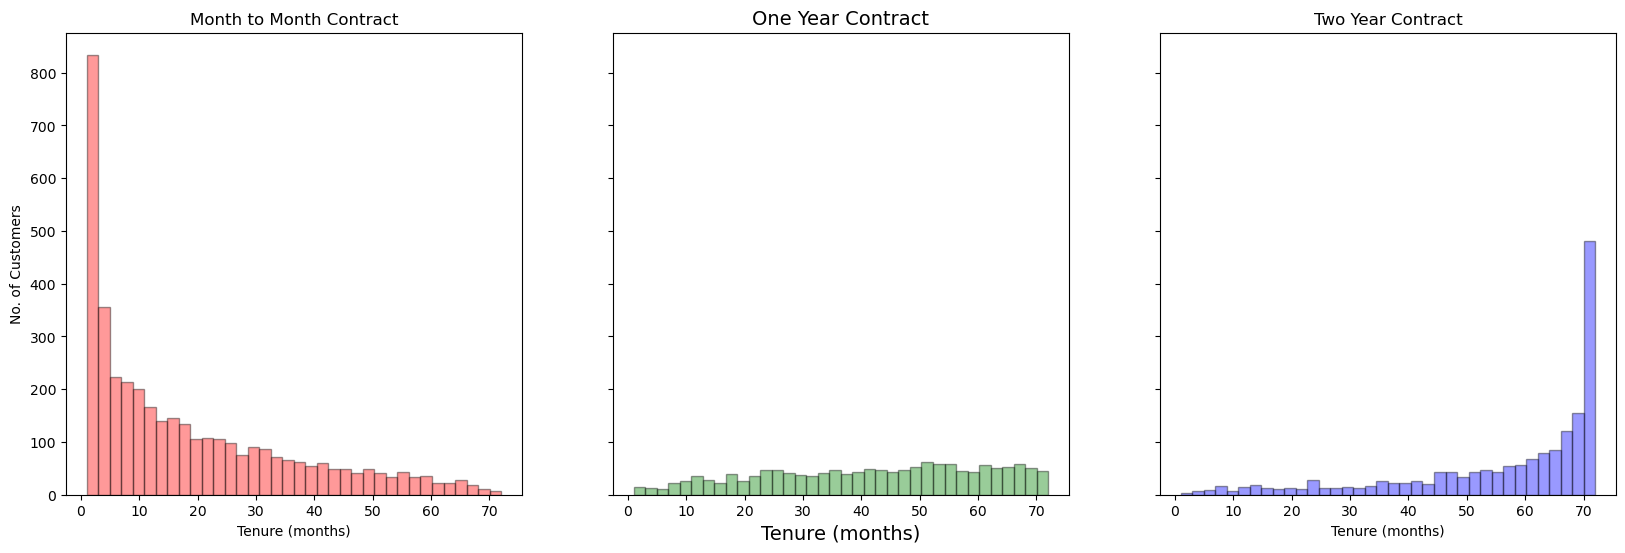

In [24]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(tele_cust[tele_cust['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'red',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(tele_cust[tele_cust['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'green',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(tele_cust[tele_cust['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'blue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

* Interestingly, most monthly contracts last only 1-2 months, while 2 year contracts last about 70 months. This indicates that customers with longer contracts are more loyal and stay with the company longer.

## C) Services Used by Customers

In [25]:
tele_cust.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [26]:
services = ['PhoneService','MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']

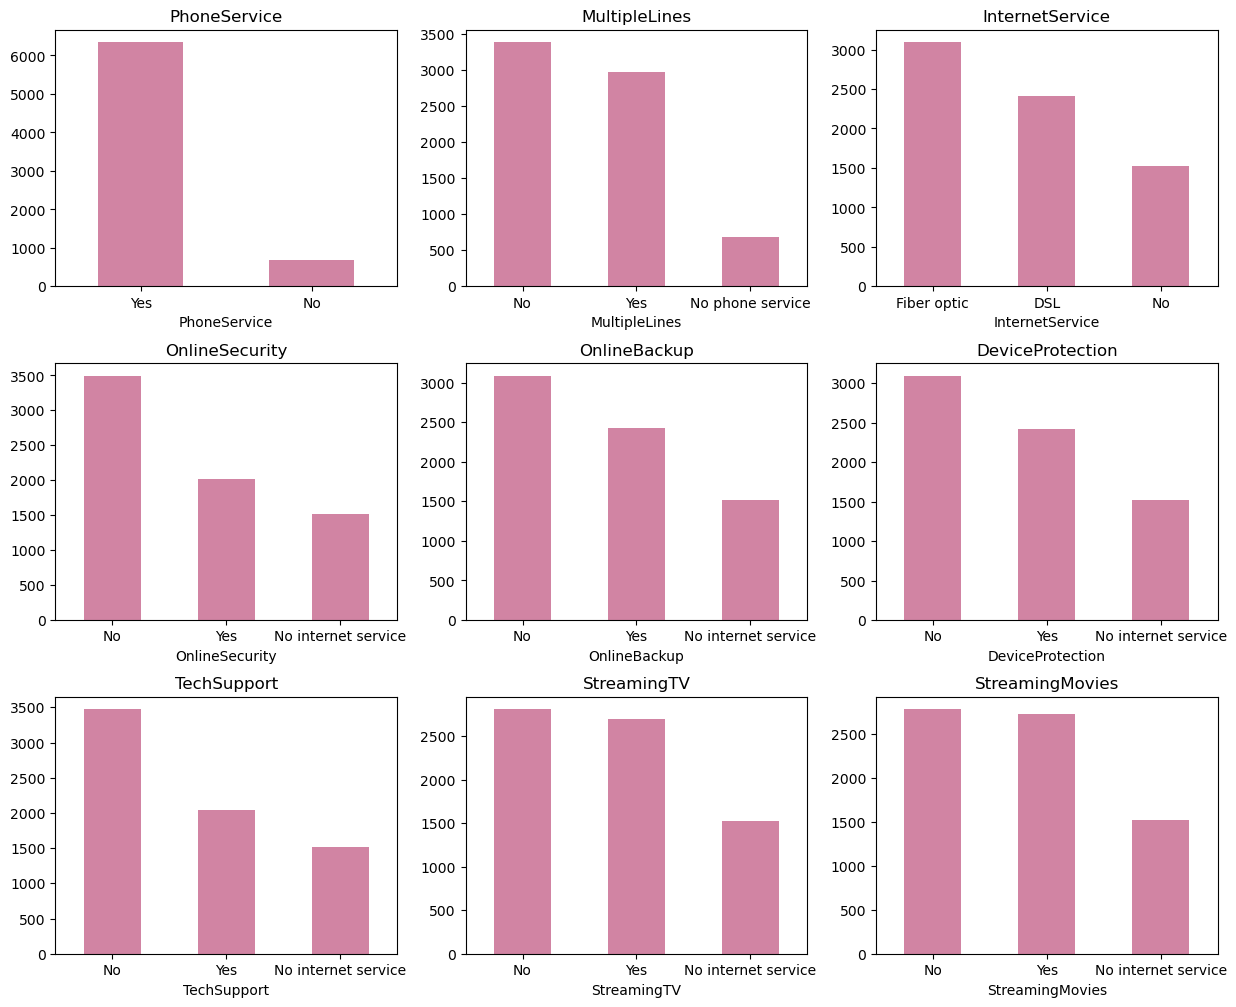

In [27]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15,12))
plt.subplots_adjust(hspace = 0.3)
color = (0.7, # redness
         0.2, # greenness
         0.4, # blueness
         0.6 # transparency
         ) 
for i, item in enumerate(services):
    row, col = divmod(i, 3) 

    ax = tele_cust[item].value_counts().plot(kind='bar', ax=axes[row, col], rot=0, color = color)
    ax.set_title(item)

    for tick in ax.get_xticklabels():
        tick.set_rotation(0)

plt.show()
    

## D) Relation Between Monthly & Total Charges

In [28]:
relation_mc = tele_cust[['MonthlyCharges','TotalCharges']]

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

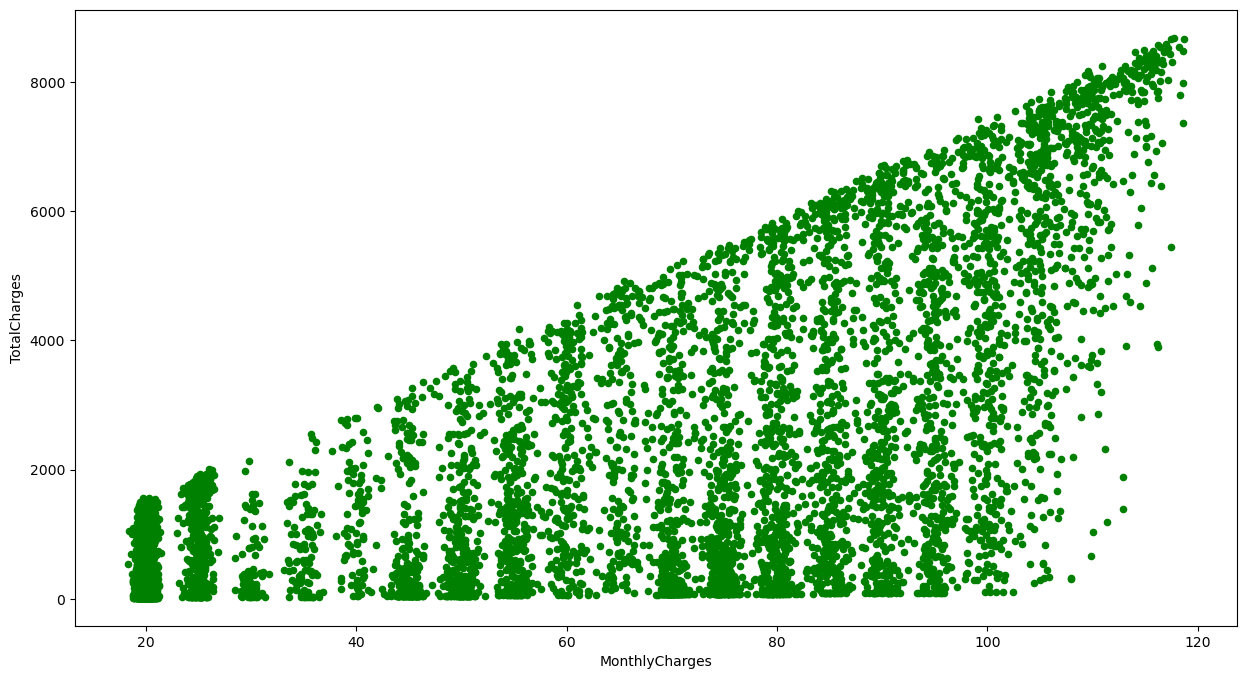

In [29]:
relation_mc.plot.scatter(x = 'MonthlyCharges',
            y = 'TotalCharges',
            color = 'green',
            figsize = (15,8))

 * Total charges increases as the monthly bill for a customer increases.

## E) Relationship between the dependent variable (Churn) and other important variables

#### 1. Churn rate with customer

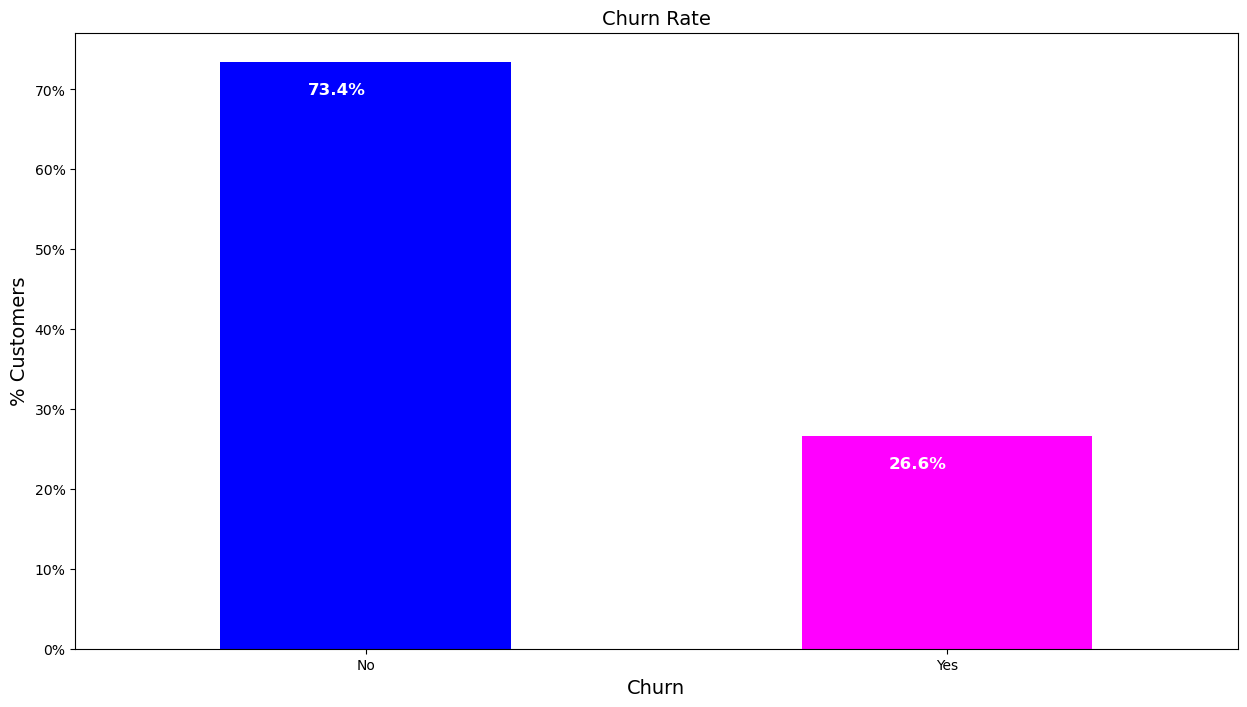

In [30]:
colors = ['blue', 'magenta']
ax = (tele_cust['Churn'].value_counts() * 100.0 / len(tele_cust)).plot(
    kind='bar',
    stacked=True,
    rot=0,
    color=colors,
    figsize=(15, 8)
)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('Churn', size=14)
ax.set_title('Churn Rate', size=14)

# Create a list to collect the plt.patches data
totals = []

# Find the values and append to the list
for i in ax.patches:
    totals.append(i.get_width())

# Set individual bar labels using the above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x() + 0.15, i.get_height() - 4.0,
            str(round((i.get_height() / total), 1)) + '%',
            fontsize=12,
            color='white',
            weight='bold')

* most customers (73.4%) stayed with the company, while a smaller group (26.6%) left. This means that even though some customers left, most of them stayed.

#### 2. Churn rate with tenure, seniority, contract type, monthly charges and total charges

##### I. Churn vs Tenure

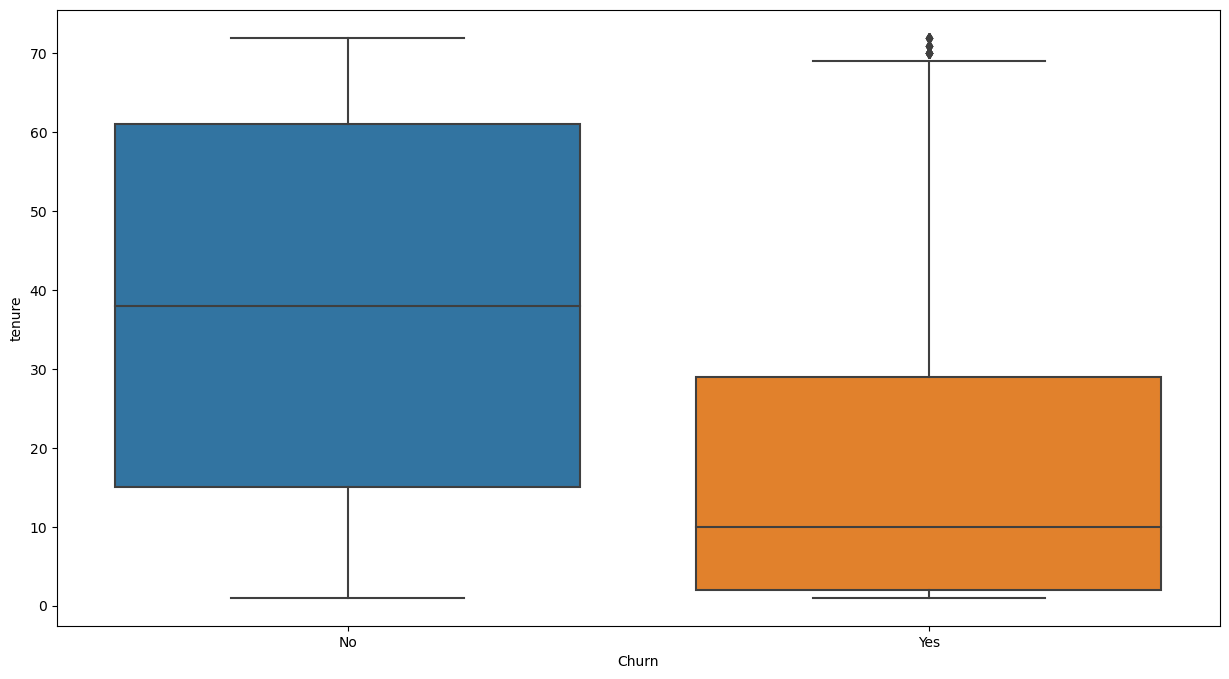

In [31]:
plt.figure(figsize=(15,8))
sns.boxplot(x = tele_cust.Churn, y = tele_cust.tenure)
plt.show()

* The customers who do not churn, they tend to stay for a longer tenure with the telecom company

##### II. Churn by Contract Type

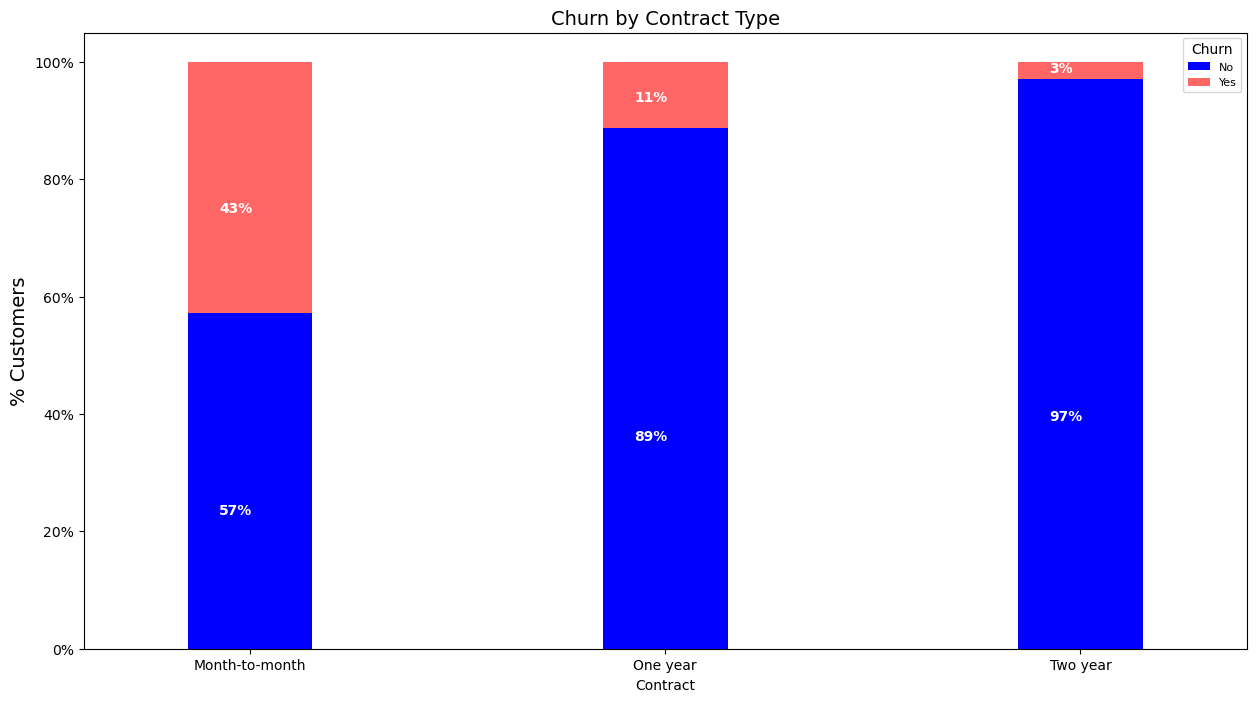

In [32]:
colors = ['blue',(1, # redness
         0.0, # greenness
         0.0, # blueness
         0.6 # transparency
         )]

contract_churn = tele_cust.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (15,8),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':8},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 10)


* The customers who have a month to month contract have a very high churn rate.

##### III. Churn by Seniority

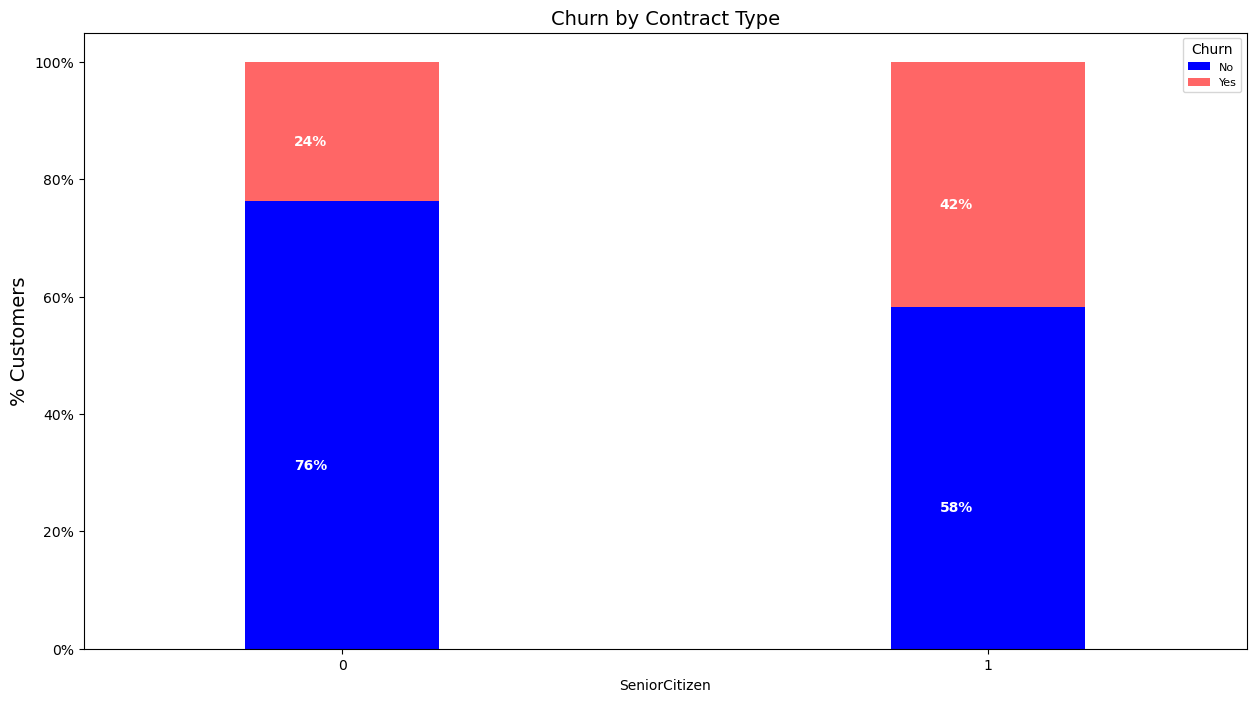

In [33]:
colors = ['blue',(1, # redness
         0.0, # greenness
         0.0, # blueness
         0.6 # transparency
         )]
sen_churn = tele_cust.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (sen_churn.T*100.0 / sen_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (15,8),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':8},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 10)


* Senior Citizens have almost double the churn rate than younger population.

##### IV. Churn by Monthly Charges

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

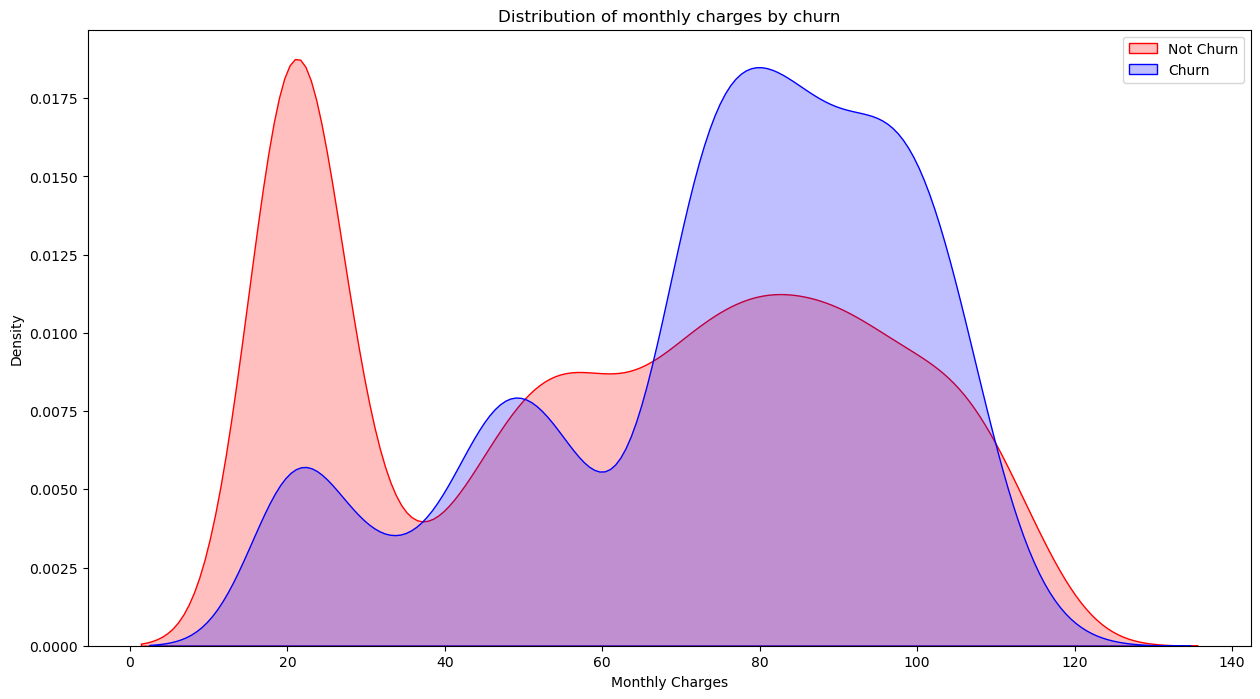

In [34]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(tele_cust.MonthlyCharges[(tele_cust["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(tele_cust.MonthlyCharges[(tele_cust["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

* Higher % of customers churn when the monthly charges are high.

##### V. Churn by Total Charges

Text(0.5, 1.0, 'Distribution of total charges by churn')

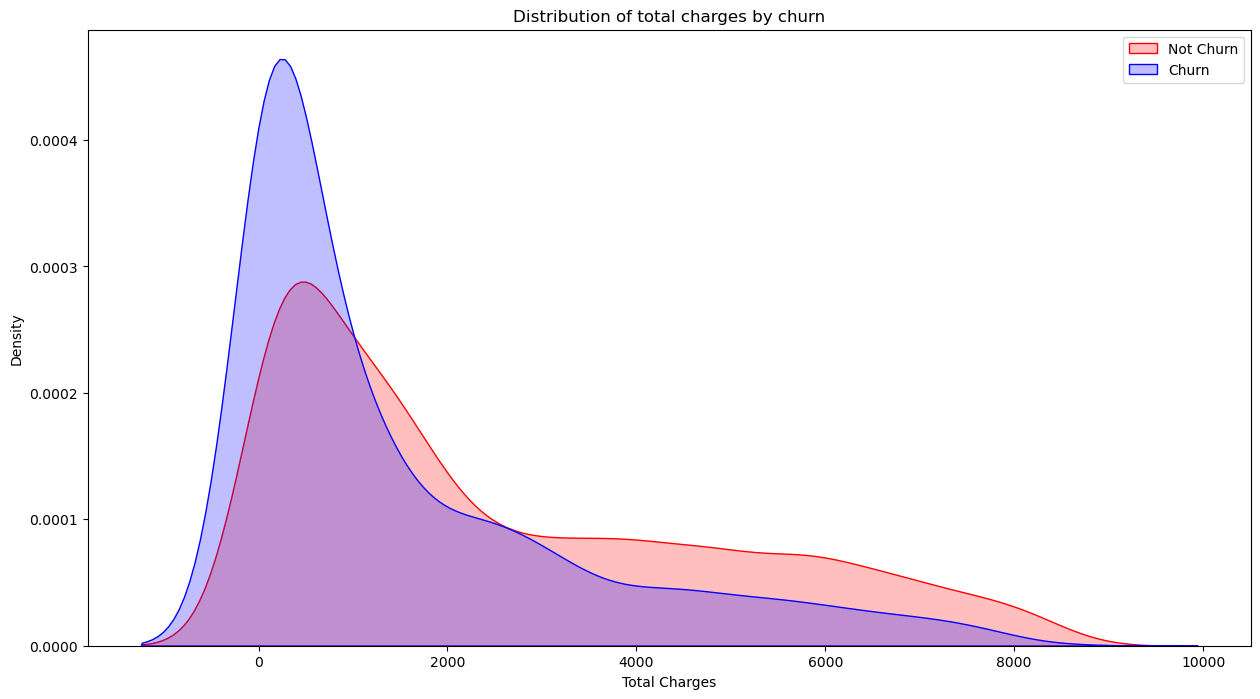

In [35]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(tele_cust.TotalCharges[(tele_cust["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(tele_cust.TotalCharges[(tele_cust["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

* There is higher churn when the total charges are lower.

# Step 4: Predictive Modeling

Developing

   * Logistic Regression
   * Random Forest
   * SVM
   * ADA Boost
   * XG Boost
   
and compare them

## 1. Logistic Regression

In [36]:
X = df_dummies.drop(columns = 'Churn', axis = 1)

In [37]:
y = df_dummies['Churn']

In [38]:
# Scaling all the variables from 0 to 1

from sklearn.preprocessing import MinMaxScaler

features = X.columns.values
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [39]:
# Creating Train & Test Data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

In [40]:
# running Logistic regression model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [41]:
from sklearn import metrics

lr_pred = model.predict(X_test)

print(f'Accuracy Score: {metrics.accuracy_score(y_test, lr_pred):.2f}')

Accuracy Score: 0.81


Axes(0.125,0.11;0.775x0.77)


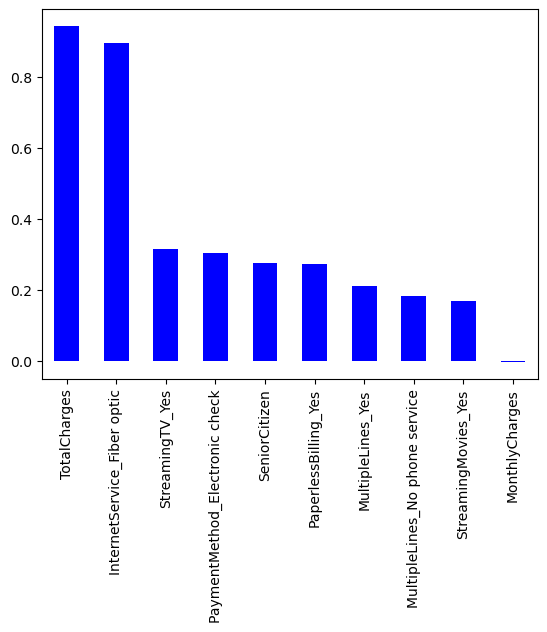

In [42]:
# To get the weights of all the variables

#plt.figure(figsize = (15,8))
weights = pd.Series(model.coef_[0], index = X.columns.values)
print(weights.sort_values(ascending = False)[:10].plot(kind = 'bar', color = 'blue'))
plt.show()

Axes(0.125,0.11;0.775x0.77)


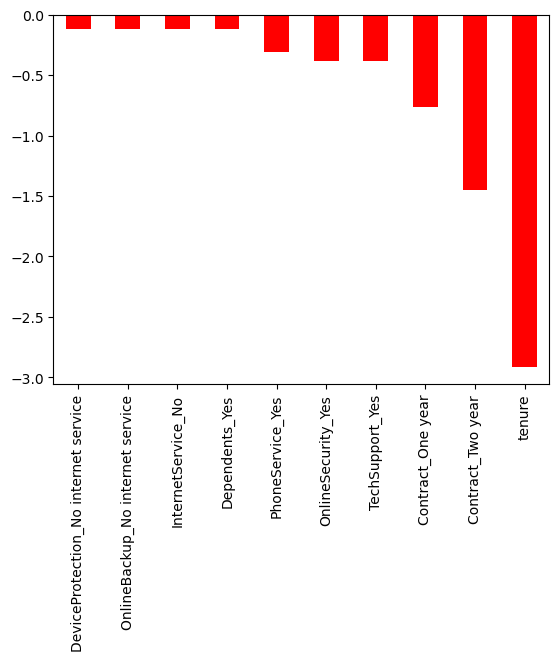

In [43]:
print(weights.sort_values(ascending=False)[-10:].plot(kind = 'bar', color = 'red'))

#### Observations- Logistic Regression

Some variables has positive and some negative relation with Predictive Variable (Churn)
 * In EDA, having 2 month contracts reduces chance of churn. That means it has negative relation with Churn.
 * DSL internet also reduces the probability of churn.
 * Total charges, monthly contracts, fibre optic internet services and security and seniority can lead to higher churn rates.

## 2. Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators = 1000, oob_score = True, n_jobs = -1, random_state = 50, max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make Predictions

rf_pred = model_rf.predict(X_test)
print(f'Accuracy Score: {metrics.accuracy_score(y_test, rf_pred):.2f}')

Accuracy Score: 0.81


<Axes: >

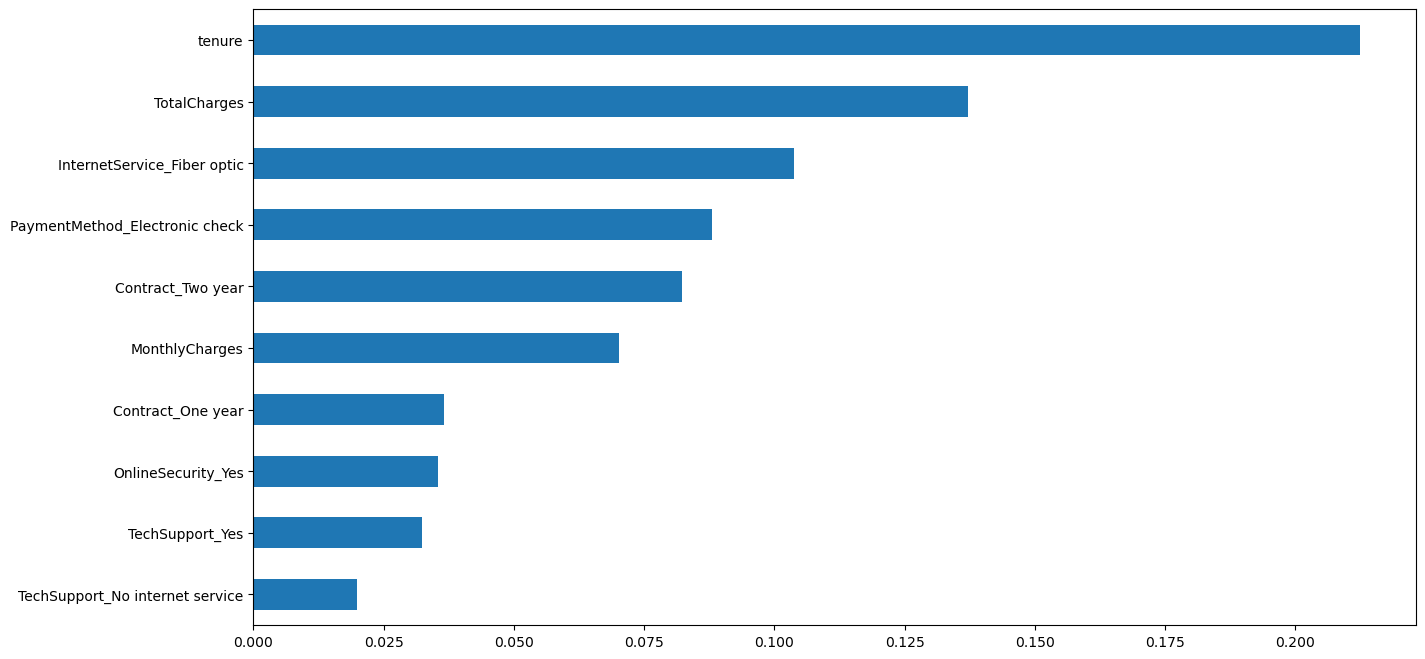

In [45]:
plt.figure(figsize = (15,8))
importances = model_rf.feature_importances_
weights = pd.Series(importances, index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

#### Observation- Random Forest

 * Monthly contract, tenure and total charges are the most imortant predictor variables to predict churn.
 * The results from random forest are very similar to that logistic regression and in line to what we hasd expected from our EDA

## 3. Support Vector Machine (SVM)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [47]:
from sklearn.svm import SVC

model_svm = SVC(kernel='linear')
model_svm.fit(X_train, y_train)
svm_pred = model_svm.predict(X_test)

print(f'Accuracy Score: {metrics.accuracy_score(y_test, svm_pred):.2f}')

Accuracy Score: 0.82


In [48]:
# creating Confusion matrix

from sklearn.metrics import confusion_matrix

print(f'Confusion Matrix:\n\n {confusion_matrix(y_test,svm_pred)}')

Confusion Matrix:

 [[952  90]
 [164 201]]


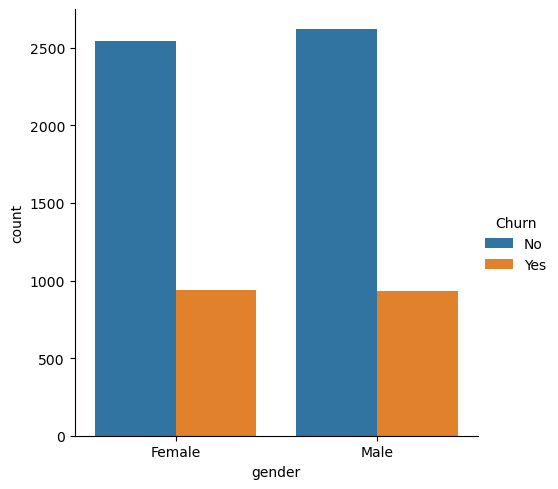

In [49]:
ax1 = sns.catplot(x = 'gender', kind = 'count', hue = 'Churn', data = tele_cust)
plt.show()

#### Observation
 
 * With SVM, the accuracy is increased to upto 82% 

## 4. ADA Boost

In [50]:
# AdaBoost Algorithm

from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=50)
model.fit(X_train, y_train)
ada_pred = model.predict(X_test)
print(f'Accuracy Score: {metrics.accuracy_score(y_test, ada_pred):.2f}')

Accuracy Score: 0.81


## 5. XG Boost

In [51]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)
xg_pred = model.predict(X_test)
print(f'Accuracy Score: {metrics.accuracy_score(y_test, xg_pred):.2f}')

Accuracy Score: 0.81


#### Observation
 
  * With XG Boost, the accuracy is increased to upto 80%